In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.6804 - accuracy: 0.1797
Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 1.6063 - accuracy: 0.2383 - val_loss: 1.4656 - val_accuracy: 0.3178
Epoch 2/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.5418 - accuracy: 0.2500
Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 1.4586 - accuracy: 0.3126 - val_loss: 1.3628 - val_accuracy: 0.3824
Epoch 3/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.4404 - accuracy: 0.3438
Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 1.3708 - accuracy: 0.3720 - val_loss: 1.2897 - val_accuracy: 0.4453
Epoch 4/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.2888 - accura

Epoch 28/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6549 - accuracy: 0.7188
Epoch 00028: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.7300 - accuracy: 0.7121 - val_loss: 0.4509 - val_accuracy: 0.8824
Epoch 29/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7292 - accuracy: 0.6641
Epoch 00029: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.7288 - val_loss: 0.4427 - val_accuracy: 0.8783
Epoch 30/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6856 - accuracy: 0.7344
Epoch 00030: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.7345 - val_loss: 0.4319 - val_accuracy: 0.8840
Epoch 31/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7801 - ac

Epoch 55/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4904 - accuracy: 0.8516
Epoch 00055: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7778 - val_loss: 0.3338 - val_accuracy: 0.8995
Epoch 56/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6197 - accuracy: 0.7578
Epoch 00056: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.7699 - val_loss: 0.3257 - val_accuracy: 0.8987
Epoch 57/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5475 - accuracy: 0.7734
Epoch 00057: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7889 - val_loss: 0.3250 - val_accuracy: 0.9109
Epoch 58/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5319 - ac

Epoch 82/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5047 - accuracy: 0.8203
Epoch 00082: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.8004 - val_loss: 0.2808 - val_accuracy: 0.9191
Epoch 83/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5151 - accuracy: 0.8047
Epoch 00083: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.7958 - val_loss: 0.2915 - val_accuracy: 0.9118
Epoch 84/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5643 - accuracy: 0.8281
Epoch 00084: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.8036 - val_loss: 0.2861 - val_accuracy: 0.9150
Epoch 85/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6159 - ac

Epoch 109/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5217 - accuracy: 0.8203
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.8086 - val_loss: 0.2596 - val_accuracy: 0.9191
Epoch 110/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5137 - accuracy: 0.7734
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7968 - val_loss: 0.2632 - val_accuracy: 0.9199
Epoch 111/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4911 - accuracy: 0.8672
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.8001 - val_loss: 0.2632 - val_accuracy: 0.9183
Epoch 112/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6822 

Epoch 136/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.3562 - accuracy: 0.8750
Epoch 00136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.8086 - val_loss: 0.2515 - val_accuracy: 0.9265
Epoch 137/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5370 - accuracy: 0.8047
Epoch 00137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.8173 - val_loss: 0.2458 - val_accuracy: 0.9232
Epoch 138/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4884 - accuracy: 0.8203
Epoch 00138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.8066 - val_loss: 0.2430 - val_accuracy: 0.9289
Epoch 139/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4973 

Epoch 163/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5106 - accuracy: 0.7812
Epoch 00163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.8230 - val_loss: 0.2400 - val_accuracy: 0.9395
Epoch 164/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.3918 - accuracy: 0.9062
Epoch 00164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.8194 - val_loss: 0.2331 - val_accuracy: 0.9412
Epoch 165/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4330 - accuracy: 0.8594
Epoch 00165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.8205 - val_loss: 0.2322 - val_accuracy: 0.9412
Epoch 166/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4659 

Epoch 190/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4296 - accuracy: 0.8438
Epoch 00190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.8159 - val_loss: 0.2276 - val_accuracy: 0.9477
Epoch 191/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4666 - accuracy: 0.8203
Epoch 00191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.8282 - val_loss: 0.2254 - val_accuracy: 0.9493
Epoch 192/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4691 - accuracy: 0.8672
Epoch 00192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.8295 - val_loss: 0.2272 - val_accuracy: 0.9485
Epoch 193/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.2956 

Epoch 217/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5124 - accuracy: 0.7969
Epoch 00217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.8265 - val_loss: 0.2175 - val_accuracy: 0.9534
Epoch 218/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6334 - accuracy: 0.7891
Epoch 00218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.8271 - val_loss: 0.2243 - val_accuracy: 0.9469
Epoch 219/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5178 - accuracy: 0.8125
Epoch 00219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.8301 - val_loss: 0.2155 - val_accuracy: 0.9518
Epoch 220/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.3677 

Epoch 244/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5638 - accuracy: 0.8125
Epoch 00244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.8306 - val_loss: 0.2195 - val_accuracy: 0.9461
Epoch 245/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4639 - accuracy: 0.8594
Epoch 00245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.8328 - val_loss: 0.2151 - val_accuracy: 0.9502
Epoch 246/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5454 - accuracy: 0.7891
Epoch 00246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.8322 - val_loss: 0.2186 - val_accuracy: 0.9502
Epoch 247/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4984 

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 600us/step - loss: 0.2180 - accuracy: 0.9485


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [23]:
    # Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
#print(np.argmax(np.squeeze(predict_result)))

[9.9332327e-01 6.6754012e-03 1.4777332e-07 1.1804771e-06 3.7283822e-08]


# Confusion matrix

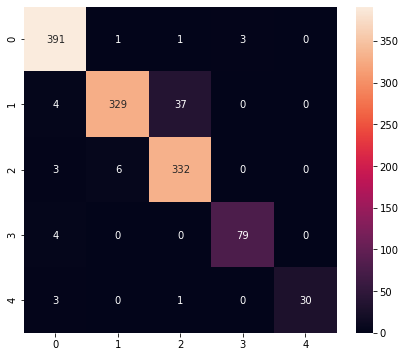

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       396
           1       0.98      0.89      0.93       370
           2       0.89      0.97      0.93       341
           3       0.96      0.95      0.96        83
           4       1.00      0.88      0.94        34

    accuracy                           0.95      1224
   macro avg       0.96      0.94      0.95      1224
weighted avg       0.95      0.95      0.95      1224



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\ASHRIT~1\AppData\Local\Temp\tmp0c_6df0o\assets


6304

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 1.01 ms


In [24]:
print(np.squeeze(tflite_results))
#print(np.argmax(np.squeeze(tflite_results)))

[9.9332327e-01 6.6754068e-03 1.4777319e-07 1.1804759e-06 3.7283680e-08]
